## Logistic Regression Example using 'sklearn'
- Will use `make_classification` for generating dataset.
- Will use only `one feature` and `m` training sets.

<img src="https://github.com/vkjadon/AI-ipynb/blob/master/images/model_lr.png?raw=1" style="width:500px;text-align:center">


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Generate Dataset

In [ ]:
# Generate dataset for Logistic Regression
data_set_x_orig, data_set_y_orig = make_classification(n_samples=100,n_features=1, n_informative=1, n_redundant=0,n_classes=2,
    n_clusters_per_class=1,)

In [ ]:
print(data_set_x_orig.shape)
print(data_set_x_orig[:,0])

(100, 1)
[ 0.35419381  1.44098956  1.1992972  -0.92789805 -1.176267   -1.0861711
  0.14964062 -1.28159039 -1.08995179 -1.06289228 -1.04246613 -1.06194652
 -0.99968266  2.98352509 -0.87927893 -1.10220283  0.60008722 -1.07968929
  0.68801309  1.22592674  1.71189359 -1.12674977  2.31774469  0.84916555
  1.62109456 -0.97870227  1.57363452 -0.19518317  1.81666512 -1.32632462
  0.48038147  0.86048267 -1.03589309 -1.10591616 -1.07281609 -0.94303945
 -1.17706406 -1.07930227 -1.11294758 -0.29008004 -0.95974078 -0.94043938
  2.034615   -0.78114228  1.90054079  0.23732596 -0.77665947 -1.10766138
  0.44716819 -1.14859553  0.55707539  0.72432435  1.39971331  1.62608245
 -1.00806157 -0.12383475  1.27436262 -0.32189374 -1.11321263 -0.9467634
  0.97130289 -1.09576533 -0.7467169  -1.21489159  0.17026516 -1.09404643
 -1.3836504  -0.67388868  1.20717244 -0.72536511  0.88317312  1.05723585
  1.70433941 -0.8879836  -0.96271502  0.37220275 -0.97922983  2.7542275
 -1.17259166 -0.14082893 -1.02440493  0.34918

### Visualization

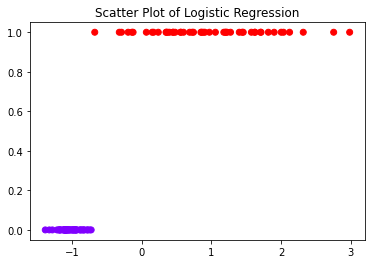

In [ ]:
plt.scatter(data_set_x_orig[:,0], data_set_y_orig, c=data_set_y_orig, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

In [ ]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(data_set_x_orig, data_set_y_orig, train_size=0.8, test_size=0.2, random_state=1)

In [ ]:
# Create a Logistic Regression Object, perform Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Show to Coeficient and Intercept
print(lr.coef_)
print(lr.intercept_)

[[3.2728385]]
[1.02700938]


In [ ]:
# Perform prediction using the test dataset
y_pred = lr.predict(x_test)
print(y_pred)

[0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0]


In [ ]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[11,  0],
       [ 0,  9]])

**Mathematical expression of the algorithm**:

For $i^{(th)}$ example $x^{(i)}$:  

$z^{(i)} = w^T x^{(i)} + b$  

$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$  

$\mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$  

The cost is then computed by summing over all training examples:  

$$J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.